In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('imdb_light_default.csv')
df2 = pd.read_csv('imdb_light_join_6_budget_10_variants_1.csv')
df3 = pd.read_csv('imdb_light_join_6_budget_10_variants_5.csv')
df4 = pd.read_csv('imdb_light_join_6_budget_5_variants_10.csv')
df5 = pd.read_csv('imdb_light_join_6_budget_5_variants_5.csv')
df6 = pd.read_csv('imdb_light_model_join_4_budget_5_variants_1.csv')

In [4]:
df.set_index(keys='query_no',inplace=True)
df2.set_index(keys='query_no',inplace=True)
df3.set_index(keys='query_no',inplace=True)
df4.set_index(keys='query_no',inplace=True)
df5.set_index(keys='query_no',inplace=True)
df6.set_index(keys='query_no',inplace=True)

In [5]:
#CALCULATE MEAN SQUARED ERROR
df['MSE']=((df['cardinality_true']-df['cardinality_predict'])**2)
df2['MSE']=((df2['cardinality_true']-df2['cardinality_predict'])**2)
df3['MSE']=((df3['cardinality_true']-df3['cardinality_predict'])**2)
df4['MSE']=((df4['cardinality_true']-df4['cardinality_predict'])**2)
df5['MSE']=((df5['cardinality_true']-df5['cardinality_predict'])**2)
df6['MSE']=((df6['cardinality_true']-df6['cardinality_predict'])**2)

In [6]:
#CALCULATE MEAN ABSOLUTE ERROR
df['MAE']=((df['cardinality_predict']-df['cardinality_true']).abs())
df2['MAE']=((df2['cardinality_predict']-df2['cardinality_true']).abs())
df3['MAE']=((df3['cardinality_predict']-df3['cardinality_true']).abs())
df4['MAE']=((df4['cardinality_predict']-df4['cardinality_true']).abs())
df5['MAE']=((df5['cardinality_predict']-df5['cardinality_true']).abs())
df6['MAE']=((df6['cardinality_predict']-df6['cardinality_true']).abs())

In [7]:
#CALCULATE MEAN ABSOLUTE PERCENTAGE ERROR
#from sklearn.metrics import mean_absolute_per
#value = mean_absolute_per
#value = ((df['cardinality_true']-df['cardinality_predict']).abs())/(df['cardinality_true'])
df['MAPE']=np.abs((df['cardinality_true']-df['cardinality_predict'])/(df['cardinality_true']))
df2['MAPE']=np.abs((df2['cardinality_true']-df2['cardinality_predict'])/(df2['cardinality_true']))
df3['MAPE']=np.abs((df3['cardinality_true']-df3['cardinality_predict'])/(df3['cardinality_true']))
df4['MAPE']=np.abs((df4['cardinality_true']-df4['cardinality_predict'])/(df4['cardinality_true']))
df5['MAPE']=np.abs((df5['cardinality_true']-df5['cardinality_predict'])/(df5['cardinality_true']))
df6['MAPE']=np.abs((df6['cardinality_true']-df6['cardinality_predict'])/(df6['cardinality_true']))

In [8]:
df['data']='1'
df2['data']='2'
df3['data']='3'
df4['data']='4'
df5['data']='5'
df6['data']='6'
data = [df,df2,df3,df4,df5,df6]
allData = pd.concat(data)

[Text(0.5, 0, 'Experimental Setup(DeepDB)')]

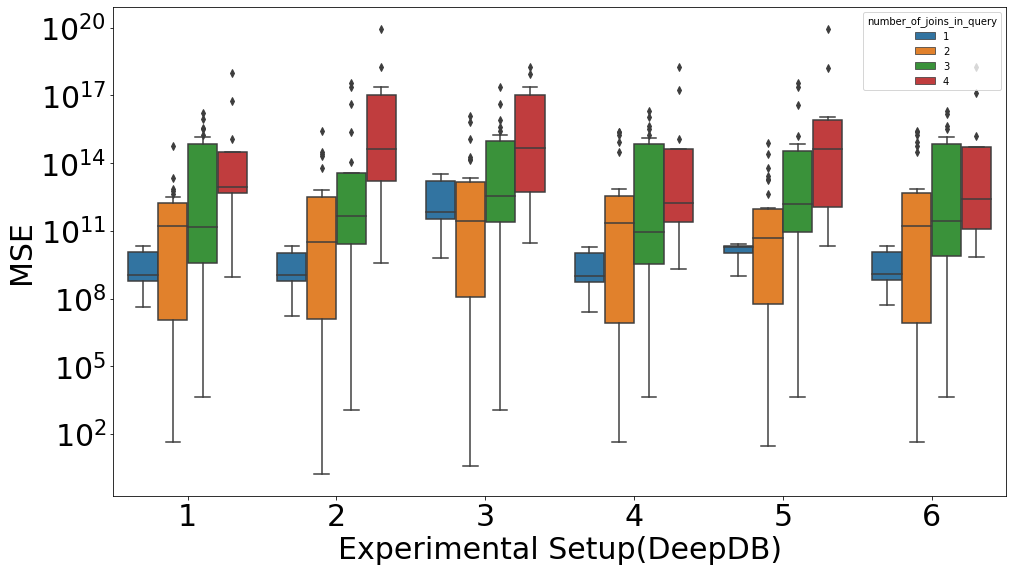

In [10]:
#MSE PLOT
plt.figure(figsize=(16,9))
plt.ylabel("MSE", fontsize=30)
plt.xlabel("Experimental Setup (DeepDB)", fontsize=30)
plt.tick_params('both', labelsize='30')
ax = sns.boxplot(y='MSE',x='data',
                 data=allData,
                hue='number_of_joins_in_query')
ax.set(yscale='log')
ax.set(xlabel = 'Experimental Setup(DeepDB)')
#plt.savefig('MSEplot1.png')
#ax.set(ylim=(10e5,10e15) )

[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Experimental Setup')]

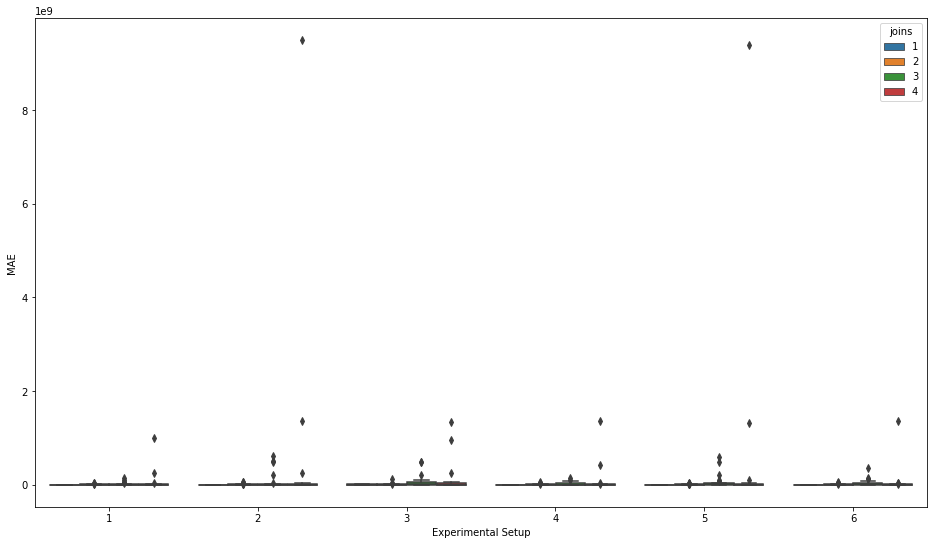

In [12]:
#MAE PLOT
#allData['MAE'].max()
#allData['MAE'].min()

plt.figure(figsize=(16,9))
ax = sns.boxplot(y='MAE',x='data',
                 data=allData,
                hue='number_of_joins_in_query')
#ax.set(yscale='log')
ax.set(xlabel = 'Experimental Setup',ylabel = 'MAE')
#ax.set(ylim=(-135690920,19268480))
#plt.savefig('MAEplot1.png')


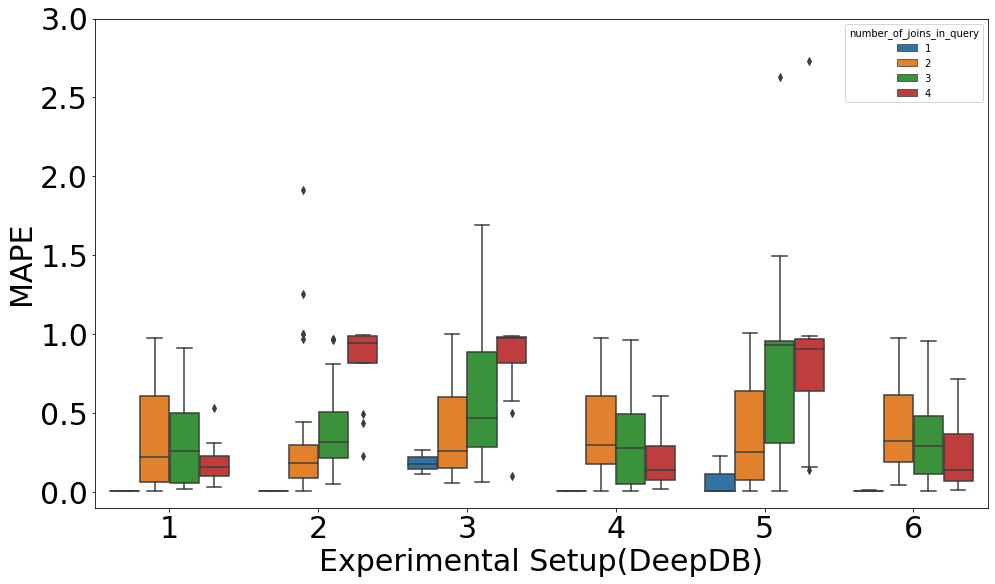

In [49]:
#MAPE PLOT
plt.figure(figsize=(16,9))
plt.ylabel("MAPE", fontsize=30)
plt.xlabel("Experimental Setup (DeepDB)", fontsize=30)
plt.tick_params('both', labelsize='30')

ax = sns.boxplot(y='MAPE',x='data',
                 data=allData,
                hue='number_of_joins_in_query')
ax.set(xlabel = 'Experimental Setup(DeepDB)')
ax.set(ylim=(-0.1,3.0))
plt.savefig('MAPEplot1.png')
